# Python Translate Script

## Description
This notebook contains functions that detail a way to get genetic sequences from a FASTA file, translate these genetic sequences into amino acid sequences (using two different methods), compute molecular weight of a string of amino acids, and compute the GC-content of a sequence of DNA. 

These functions are then applied to genetic sequences belonging to different species of penguin (encoding cytochrome-b). By adding penguin mass to a table including calculate molecular weight and GC-content of the penguin amino acid and DNA sequences, this script facilitates visualization of a comparison of penguin mass according to species (in the form of a bar plot) and molecular weight of amino acid sequences as a function of GC-content (as a scatter plot). This script also includes a step to save the resulting dataframe (including penguin species, mass, molecular weight, and GC-content) as a CSV file. 

Finally, bonus steps detail adding primary region in which each penguin species lives to the dataframe to graph mass of each penguin with species grouped by region and a function to calculate instability index from amino acid sequences, allowing for instability index to be graphed as a function of molecular weight. 

This script was written with reference to the [EEOB/BCB 546: Programming with Python tutorials](https://eeob-biodata.github.io/BCB546X-python/). Additional references were used throughout this script and are noted in each relevant section in which they were used.

## Dependencies
This script reqires both the [Biopython](https://biopython.org/) and [Pandas](https://pandas.pydata.org/) packages, as well as the [seaborn](https://seaborn.pydata.org/) library. From Biopython, this script uses the [Bio.Data package](https://biopython.org/docs/1.75/api/Bio.Data.html), [Bio.Seq module](https://biopython.org/docs/1.75/api/Bio.Seq.html), and [Bio.SeqUtils.ProtParam module](https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html). The script was completed in Python 3.9.7.

## Authors

This script was authored by Elizabeth McMurchie, based on the work of Dr. X. 

## Date

This script was last edited on May 3, 2022.

### Import necessary packages

Below, Dr. X specified that we need to import SeqID and CodonTable, both from BioPython, as well as pandas. 

In [1]:
# Make sure BioPython and pandas are installed first
from Bio import SeqIO
from Bio.Data import CodonTable
from Bio.Seq import Seq
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import pandas as pd
import seaborn as sns

## Functions

### 1. Function `get_sequences_from_file(fasta_fn)`

**Description**: Gets species names and associated genetic sequences from FASTA-formatted files and places them in a dictionary.

**Arguments**: 
- `fasta_fn`: Sequence file in FASTA format

**Return**: A dictionary containing containing the species names and sequences associated with each species from a FASTA-formatted file. The dictionary is returned in the format {'Genus1 species1': Seq('SEQUENCE1'), 'Genus2 species2': Seq('SEQUENCE2'), ...} with each sequence written in the format of nitrogenous bases A, C, G, and T. The species names form the keys in the dictionary and the sequences form the values. 

**Example of usage**: 
```
>>> penguin_sequences = get_sequences_from_file("penguins_cytb.fasta")
>>> print(penguin_sequences)
```

**Output**: 
```
{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus magellanicus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA')}
```

This function was written by Dr. X in in Python 3.9.7 and documented by me (Elizabeth). It requires the SeqIO from Biopython.

In [2]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {} # empty dictionary 
    for record in SeqIO.parse(fasta_fn, "fasta"): # from BioPython
        description = record.description.split() # sets description of sequence
        species_name = description[1] + " " + description[2] # splits description into two words to make species name
        sequence_data_dict[species_name] = record.seq # completes formation of dictionary where species name is key and value is sequence
    return(sequence_data_dict)

In [27]:
# Example Function 1:
# Be sure to run "from Bio import SeqIO" before using this function
penguin_sequences = get_sequences_from_file("penguins_cytb.fasta")
print(penguin_sequences)
type(penguin_sequences)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

dict

### 2. Function `translate(string_nucleotides)`

**Description**: Translates a string representing a sequence of DNA nucleotides to corresponding animo acids.

**Arguments**:
- `string_nucleotides`: A string of nucleotides representing a DNA sequence

**Return**: A string of amino acid abbreviations representing the translation of the original DNA sequence string. The translation stops at the stop codon, as the stop codon signals the end of translation and is not translated itself.

**Example of usage**: 
```
>>> translate_A_forsteri = translate(penguin_sequences["Aptenodytes forsteri"])
>>> print(translate_A_forsteri)
```

**Output**: 
```
MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
```

Dr. X wrote the pseudocode for this function. It was written and documented in Python 3.9.7 by me (Elizabeth). It requires CodonTable from the BioPython Bio.Data package.
I referenced the following resources to write this function: 
- [Python Empty List Tutorial – How to Create an Empty List in Python](https://www.freecodecamp.org/news/python-empty-list-tutorial-how-to-create-an-empty-list-in-python/): To make an empty list.
- [Iterate over a list in Python](https://www.geeksforgeeks.org/iterate-over-a-list-in-python/): To iterate over an empty list.
- [DNA to Protein in Python 3](https://www.geeksforgeeks.org/dna-protein-python-3/): To see how to iterate over codons (sets of 3 nucleotides).
- [learnpython.org: Conditions](https://www.learnpython.org/en/Conditions): To review conditional statements.
- [The Python Tutorial » 5. Data Structures](https://docs.python.org/3/tutorial/datastructures.html): To review data structures and how to append to a list.
- [How do I concatenate items in a list to a single string?](https://stackoverflow.com/questions/12453580/how-do-i-concatenate-items-in-a-list-to-a-single-string): To convert the list to a string.

In [4]:
def translate(string_nucleotides):
    codons = [(string_nucleotides[i:i + 3]) for i in range(0, len(string_nucleotides), 3)] # make codons a list iterate over every codon
    aa_seq_list = [] # empty list we'll need to put amino acids into
    stop_codons = ["TAA", "TAG", "AGA", "AGG"] 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # table for vetebrate mitochondrial codon DNA translation
    for codon in codons: 
        if codon not in stop_codons:
            aa_seq_list.append(mito_table.forward_table[codon]) # translation step - append from translation table from BioPython
    aa_seq_string = ''.join(aa_seq_list) # make list a string 
    return(aa_seq_string)


In [26]:
# Example Function 2: 
# Be sure to run "from Bio.Data import CodonTable" before using this function
translate_A_forsteri = translate(penguin_sequences["Aptenodytes forsteri"])
print(translate_A_forsteri)
type(translate_A_forsteri)

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


str

### 3. Function `biopy_translate(string_nucleotides)`

**Description**: Translates a string representing a sequence of DNA nucleotides to corresponding animo acids, making use of BioPython library utilities.

**Arguments**:
- `string_nucleotides`: A string of nucleotides representing a DNA sequence

**Return**: A string of amino acid abbreviations representing the translation of the original DNA sequence string. As this uses the `translate()` function from the BioPython Bio.Seq module, the stop codon is automatically left out.

**Example of usage**: 
```
>>> biopy_translate_A_forsteri = biopy_translate(penguin_sequences["Aptenodytes forsteri"])
>>> print(biopy_translate_A_forsteri)
```

**Output**: 
```
MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH
```

This function was written and documented in Python 3.9.7 by me (Elizabeth), based off a concept by Dr. X.  It requires CodonTable from the BioPython Bio.Data package, and relies on the Bio.Seq module.
I referenced the following resources to write this function: 
- [Bio.Seq module](https://biopython.org/docs/1.75/api/Bio.Seq.html): To find the `translate()` function from Bio.Seq and understand how it works so it could be used within this function.
- [Handling sequences with the Seq class](https://biopython.org/wiki/Seq): To understand how to work with sequence data in the Seq class. 
- [How to convert an object to a string in Python](https://www.adamsmith.haus/python/answers/how-to-convert-an-object-to-a-string-in-python): To convert the Seq class object that results from `translate()` into a string that can be used later.

In [6]:
def biopy_translate(string_nucleotides):
    biopy_mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # table for vetebrate mitochondrial codon DNA translation
    biopy_aa_seq = string_nucleotides.translate(table = biopy_mito_table, cds = True) # from Biopython, translate sequence
    biopy_aa_seq_string = str(biopy_aa_seq) # make amino acid sequence a string
    return(biopy_aa_seq_string)

In [25]:
# Example Function 3:
# Be sure to run "from Bio.Data import CodonTable" and "from Bio.Seq import Seq" before using this function.
biopy_translate_A_forsteri = biopy_translate(penguin_sequences["Aptenodytes forsteri"])
print(biopy_translate_A_forsteri)
type(biopy_translate_A_forsteri)

MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWTWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDILGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMAFRPLSQLLFWALVANLIILTWVGSQPVEHPFIIIGQLASLTYFTTLLILFPIAGALENKMLNH


str

### 4. Function `compute_molecular_weight(aa_seq_string)`

**Description**: Computes the molecular weight (in kilograms per mole) of an amino acid sequence string. 

**Arguments**:
- `aa_seq_string`: A string representing a sequence of amino acids. 

**Return**: A floating point number representing molecular weight (in kilograms per mole) of the given amino acid sequence, as calculated by the `molecular.weight()` function from the BioPython ProtParam module.

**Example of usage**: 
```
>>> mol_weight_A_forsteri = compute_molecular_weight(translate_A_forsteri)
>>> print(mol_weight_A_forsteri)
```

**Output**: 
```
42459.602100000004
```

This function was written and documented in Python 3.9.7 by me (Elizabeth) based on a concept by Dr. X. It requires the ProtParam module, part of the SeqUtils package in BioPython.
I referenced the following resources to write this function: 
- [Analyzing protein sequences with the ProtParam module](https://biopython.org/wiki/ProtParam): To determine how to run ProtParam and the ProtParam tools, as well as the `ProteinAnalysis` class.
- [Bio.SeqUtils.ProtParam module](https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html): To further understand the `molecular_weight` function.

In [8]:
def compute_molecular_weight(aa_seq_string):
    prot_analysis = ProteinAnalysis(aa_seq_string)
    mol_weight = prot_analysis.molecular_weight()
    return(mol_weight)

In [24]:
# Example function 4
# Be sure to run "from Bio.SeqUtils.ProtParam import ProteinAnalysis" before using this function
mol_weight_A_forsteri = compute_molecular_weight(translate_A_forsteri)
print(mol_weight_A_forsteri)
type(mol_weight_A_forsteri)

42459.602100000004


float

### 5. Function `gc_count(string_nucleotides)`

**Description**: Computes the proportion of G and C nucleobases in a nucleotide sequence. 

**Arguments**:
- `string_nucleotides`: A string representing a sequence of nucleotides. 

**Return**: A floating point number representing the proportion of nucleotides that are 'G' and 'C' (nucleotides with nucleobases guanine and cytosine) in a string representing a nucleotide sequence.

**Example of usage**: 
```
>>> gc_A_forsteri = gc_count(penguin_sequences["Aptenodytes forsteri"])
>>> print(gc_A_forsteri)
```

**Output**: 
```
0.48381452318460194
```

This function was written and documented in Python 3.9.7 by me (Elizabeth), based on a concept by Dr. X. 

In [10]:
def gc_count(string_nucleotides):
    G_content = string_nucleotides.count('G') 
    C_content = string_nucleotides.count('C')
    gc_proportion = ((G_content + C_content)/ len(string_nucleotides))
    return(gc_proportion)

In [28]:
# Example function 5
gc_A_forsteri = gc_count(penguin_sequences["Aptenodytes forsteri"])
print(gc_A_forsteri)
type(gc_A_forsteri)

0.48381452318460194


float

## Main

###
The following code was provided by Dr. X. It brings the sequences in from `penguins_cytb.fasta` and assigns them to the `cytb_seqs` dictionary, places the data from the `penguins_mass.csv` file into a dataframe, and creates a species list from the penguins dataframe. The step reading the csv into the dataframe (named `penguins_df`) requires the pandas library. 

In [12]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass. Requires pandas
species_list = list(penguins_df.species)

### 6. Adding new columns to the dataframe

Below, I made a copy of the `penguins_df` dataframe (named `penguins_df_copy`), and added two columns, one for molecular weight ("mol_weight"), and the other for G and C content in the original sequences ("GC_content"). 

I referenced the following resources to write this code: 
- [How To Add An Empty Column To Pandas Dataframe](https://www.stackvidhya.com/how-to-add-an-empty-column-to-pandas-dataframe): To add empty columns to the dataframe

In [13]:
penguins_df_copy = penguins_df.copy() # make copy of dataframe
penguins_df_copy["mol_weight"] = "NaN"
penguins_df_copy["GC_content"] = "NaN"
print(penguins_df_copy)

                    species   mass mol_weight GC_content
0      Aptenodytes forsteri  28.00        NaN        NaN
1   Aptenodytes patagonicus  13.40        NaN        NaN
2       Eudyptes chrysocome   2.80        NaN        NaN
3     Eudyptes chrysolophus   4.50        NaN        NaN
4         Eudyptes sclateri   4.25        NaN        NaN
5           Eudyptula minor   1.60        NaN        NaN
6        Pygoscelis adeliae   4.60        NaN        NaN
7     Pygoscelis antarctica   4.10        NaN        NaN
8          Pygoscelis papua   6.10        NaN        NaN
9       Spheniscus demersus   3.20        NaN        NaN
10     Spheniscus humboldti   4.75        NaN        NaN
11  Spheniscus magellanicus   3.40        NaN        NaN


### 7. Writing a for-loop translating each sequence, getting molecular weight, computing GC content, and adding those data to the dataframe

Below, I wrote code that runs a for-loop over the `cytb_seqs` dictionary, based on pseudocode written by Dr. X. The for-loop first translates the DNA sequences for each penguin species, using the `translate(string_nucleotides)` function (function 2), next computes molecular weight for each sequence, using the `compute_molecular_weight(aa_seq_string)` function (function 4), then calculates GC content of the original sequence using the `gc_count(string_nucleotides)` function (function 5), and finally assigns the molecular weight values to the "mol_weight" column in the dataframe and assigns the GC content values in the "GC_content" column in the dataframe. The following code uses the pandas library. 

I referenced the following resources to write this code: 
- [How to update values in a specific row in a Python Pandas DataFrame?](https://stackoverflow.com/questions/24036911/how-to-update-values-in-a-specific-row-in-a-python-pandas-dataframe): To enter the molecular weight and GC content values into their associated columns in the dataframe. 
- [pandas.DataFrame.loc](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html): To better understand `.loc` from pandas and how to use it.  

In [14]:
for species, sequence in cytb_seqs.items():
    aa_seq = translate(sequence) # from function 2
    mol_weight = compute_molecular_weight(aa_seq) # from function 4
    gc_content = gc_count(sequence) # from function 5
    penguins_df_copy.loc[penguins_df_copy["species"] == species, "mol_weight"] = mol_weight # put mol weight in dataframe
    penguins_df_copy.loc[penguins_df_copy["species"] == species, "GC_content"] = gc_content # put gc content in dataframe
print(penguins_df_copy)

                    species   mass  mol_weight GC_content
0      Aptenodytes forsteri  28.00  42459.6021   0.483815
1   Aptenodytes patagonicus  13.40  42563.7067   0.496938
2       Eudyptes chrysocome   2.80  42475.5753   0.511811
3     Eudyptes chrysolophus   4.50  42445.5493   0.509186
4         Eudyptes sclateri   4.25  42475.5753   0.508311
5           Eudyptula minor   1.60  42491.6408   0.492563
6        Pygoscelis adeliae   4.60   42458.614   0.490814
7     Pygoscelis antarctica   4.10  42404.5423    0.47769
8          Pygoscelis papua   6.10  42595.8759   0.471566
9       Spheniscus demersus   3.20   42431.549    0.48294
10     Spheniscus humboldti   4.75   42399.552   0.492563
11  Spheniscus magellanicus   3.40  42459.6021   0.482065


### 8. Bar chart of penguin species mass

By making a bar chart of penguin species mass, we can see that the penguin with the lowest mass is *Eudyptula minor*, providing an answer to Dr. X's question about which penguin species is smallest. According to the [Aquarium of the Pacific](https://www.aquariumofpacific.org/onlinelearningcenter/species/little_blue_penguin), *Eudyptula minor*, the little blue penguin or fairy penguin, lives along the New Zealand coast and the southern coast of Australia.

The following barchart was made using the seaborn data visualization library. 

I referenced the following resources to write this code: 
- [seaborn.barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html): To learn how to make a barplot with seaborn. 
- [Rotate Axis Tick Labels of Seaborn Plots](https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/): To tilt the axis tick labels for penguin species so they could be easily read. 
- [Add Axis Labels to Seaborn Plot](https://www.delftstack.com/howto/seaborn/set-axis-labels-seaborn-python/): To add x- and y-axis labels and change the font size of these labels. 
- [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html): To choose a colorblind-friendly palette to increase accessibility.

Text(0, 0.5, 'Mass (kg)')

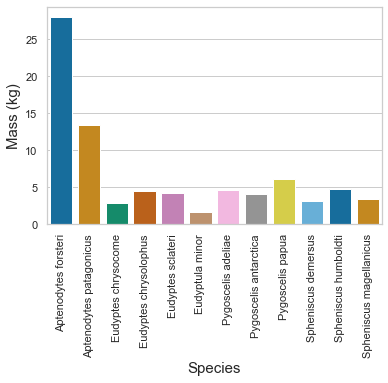

In [15]:
sns.set_theme(style="whitegrid") # theme for plot
penguin_mass = sns.barplot(x="species", y="mass", data=penguins_df_copy, palette = "colorblind") 
penguin_mass.set_xticklabels(penguin_mass.get_xticklabels(),rotation = 90) 
penguin_mass.set_xlabel("Species", fontsize = 15)
penguin_mass.set_ylabel("Mass (kg)", fontsize = 15)

### 9. Visualization of molecular weight as a function of GC-content

Here, I wrote code that allows us to visualize molecular weight of amino acid sequences as a function of GC-content using a scatter plot. There does not appear to be a strong correlation between GC-content and molecular weight.

The following scatter plot was made using the seaborn data visualization library. 

I referenced the following resources to write this code: 
- [Seaborn Styling, Part 1: Figure Style and Scale](https://www.codecademy.com/article/seaborn-design-i): To change figure style.
- [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html): To choose a colorblind-friendly palette to increase accessibility.

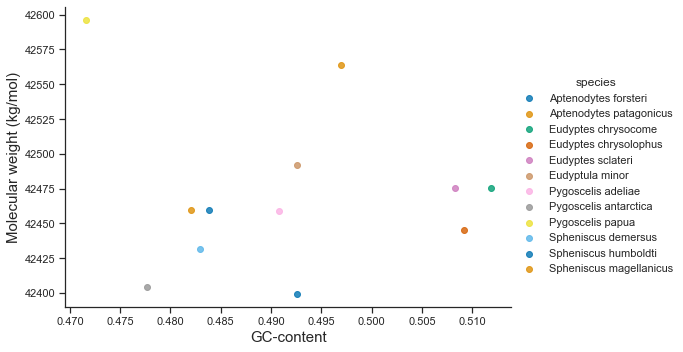

In [16]:
sns.set_style("ticks")
mol_weight_gc = sns.lmplot(x="GC_content", y="mol_weight", data=penguins_df_copy, fit_reg=False, aspect=1.5, hue = "species", palette = "colorblind")
# fit_reg=False prevents regression line from being added 
# aspect=1.5 to make plot wider than tall, making it easier to read
mol_weight_gc.set_axis_labels('GC-content', 'Molecular weight (kg/mol)', fontsize = 15)

### 10. Saving dataframe to a CSV

Below, I saved the new dataframe (`penguins_df_copy`) as a CSV file. The following code uses the pandas software library.

I referenced the following resources to write this code: 
- [pandas.DataFrame.to_csv](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html): To better understand the `.to_csv` function from pandas. 
- [Writing a pandas DataFrame to CSV file](https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file): To see an example of how to use the `.to_csv` function.

In [17]:
penguins_df_copy.to_csv("penguins_mass_cytb.csv", index=False) # index=False to prevent index column from being added to CSV

### 11. a. Bonus part 1 - Penguin mass grouped by region

I was curious as to whether penguins that typically live in more southern latitudes tend to be heavier than penguins that live in more northern (and presumably warmer) latitudes, as might be expected under [Bergmann's rule](https://onlinelibrary.wiley.com/doi/abs/10.1111/oik.03698). 

First, I made a copy of the `penguins_df_copy` dataframe and added a new column for region in which penguins primarily live (taken from the [Wikipedia page on penguins](hhttps://en.wikipedia.org/wiki/Penguin)). I then made a graph of penguin mass according to species, with species grouped by region in which they live. 

I referenced the following resources to write this code: 
-[Adding new column to existing DataFrame in Pandas](https://www.geeksforgeeks.org/adding-new-column-to-existing-dataframe-in-pandas/): To add a new column to the penguins dataframe, starting with a string that includes all regions in order.
- [How to change or update a specific cell in Python Pandas Dataframe](https://re-thought.com/how-to-change-or-update-a-cell-value-in-python-pandas-dataframe/): To update an empty region column so I could add region for each penguin species one by one (or several at a time).
- [How to reorder indexed rows based on a list in Pandas data frame](https://stackoverflow.com/questions/30009948/how-to-reorder-indexed-rows-based-on-a-list-in-pandas-data-frame): To learn how to reindex the rows so penguin species could be grouped by region. 
- [Changing width of bars in bar chart created using seaborn.factorplot](https://stackoverflow.com/questions/34888058/changing-width-of-bars-in-bar-chart-created-using-seaborn-factorplot): To increase width of bars in the bar plot. 


                    species   mass  mol_weight GC_content         region
0      Aptenodytes forsteri  28.00  42459.6021   0.483815     Antarctica
1   Aptenodytes patagonicus  13.40  42563.7067   0.496938   Subantarctic
2       Eudyptes chrysocome   2.80  42475.5753   0.511811   Subantarctic
3     Eudyptes chrysolophus   4.50  42445.5493   0.509186   Subantarctic
4         Eudyptes sclateri   4.25  42475.5753   0.508311   NZ_Australia
5           Eudyptula minor   1.60  42491.6408   0.492563   NZ_Australia
6        Pygoscelis adeliae   4.60   42458.614   0.490814     Antarctica
7     Pygoscelis antarctica   4.10  42404.5423    0.47769   Subantarctic
8          Pygoscelis papua   6.10  42595.8759   0.471566   Subantarctic
9       Spheniscus demersus   3.20   42431.549    0.48294         Africa
10     Spheniscus humboldti   4.75   42399.552   0.492563  South_America
11  Spheniscus magellanicus   3.40  42459.6021   0.482065  South_America
                    species   mass  mol_weight GC_c

Text(0, 0.5, 'Mass (kg)')

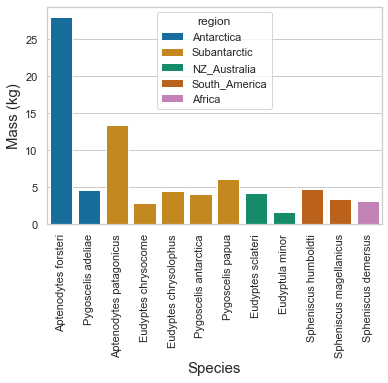

In [18]:
# Two ways to add new column to dataframe
#first way, by makeing a string and assigning it to new column
penguins_df_copy2 = penguins_df_copy.copy() # make copy of dataframe
region = ['Antarctica', 'Subantarctic', 'Subantarctic', 'Subantarctic', 'NZ_Australia', 'NZ_Australia', 'Antarctica', 'Subantarctic', 'Subantarctic', 'Africa', 'South_America', 'South_America']
# above, make string for regions
penguins_df_copy2['region'] = region
print(penguins_df_copy2)

# alternately, make new empty column and assign individual values 
penguins_df_copy3 = penguins_df_copy.copy() # make copy of dataframe
penguins_df_copy3["region"] = "NaN" # make empty regions column
penguins_df_copy3.at[0,'region']="Antarctica"
penguins_df_copy3.at[1:3,'region']="Subantarctic"
penguins_df_copy3.at[4:5,'region']="NZ_Australia"
penguins_df_copy3.at[6,'region']="Antarctica"
penguins_df_copy3.at[7:8,'region']="Subantarctic"
penguins_df_copy3.at[9,'region']="Africa"
penguins_df_copy3.at[10:11,'region']="South_America"
print(penguins_df_copy3)

# Barplot steps below
penguins_df_copy4 = penguins_df_copy2.reindex([0, 6, 1, 2, 3, 7, 8, 4, 5, 10, 11, 9]) # to group regions together in graph
print(penguins_df_copy4)
sns.set_theme(style="whitegrid") # theme for plot
penguin_mass = sns.barplot(x="species", y="mass", data=penguins_df_copy4, palette = "colorblind", hue = "region", dodge=False) 
penguin_mass.set_xticklabels(penguin_mass.get_xticklabels(),rotation = 90) 
penguin_mass.set_xlabel("Species", fontsize = 15)
penguin_mass.set_ylabel("Mass (kg)", fontsize = 15)

### 11. b. Bonus part 2 - Instability index as a function of molecular weight

I was curious about [instability index](https://academic.oup.com/peds/article-abstract/4/2/155/1491271?redirectedFrom=fulltext) for the different proteins produced by the sequences associated with each penguin species. I didn't think that they would be likely to be unstable (instability index of greater than 40), but I wasn't sure how much variation would be seen. I decided to write a function based on the Biopython ProteinAnalysis tools to analyze instability index and graph it as a function of molecular weight, wondering if instability might be greater at higher molecular weights (as they might have more unstable dipeptides).  

First, I needed to make a function to measure instability index of a sequence of amino acids, I next made a dataframe with instability index in a new column, and finally graphed instability index as a function of molecular weight. I didn't see a strong pattern between instability index and molecular weight, though. 

### Function `compute_instability(aa_seq_string)`

**Description**: Computes instability index of a protein resulting from a string of amino acids, making use of BioPython library utilities.

**Arguments**:
- `aa_seq_string`: A string of amino acids. 

**Return**: A floating point number representing the instability index value of a protein according to [Guruprasad et al. 1990](https://academic.oup.com/peds/article-abstract/4/2/155/1491271?redirectedFrom=fulltext), based on the number of unstable dipeptides in a sequence of amino acids. 

**Example of usage**: 
```
>>>instability_A_forsteri = compute_instability(translate_A_forsteri)
>>>print(instability_A_forsteri)
```

**Output**: 
```
31.87976315789473
```

This function was written and documented in Python 3.9.7 by me (Elizabeth). It requires the ProtParam module, part of the SeqUtils package in BioPython.
I referenced the following resources to write this function: 
- [Bio.SeqUtils.ProtParam module](https://biopython.org/docs/1.75/api/Bio.SeqUtils.ProtParam.html): To learn about the possibilities of the ProtParam module in Biopython and figure out how to use instability index.

In [19]:
def compute_instability(aa_seq_string):
    prot_analysis = ProteinAnalysis(aa_seq_string)
    instability = prot_analysis.instability_index()
    return(instability)

In [29]:
# Example function 11b
# Be sure to run "from Bio.SeqUtils.ProtParam import ProteinAnalysis" before using this function
instability_A_forsteri = compute_instability(translate_A_forsteri)
print(instability_A_forsteri)
type(instability_A_forsteri)

31.87976315789473


float

In [21]:
# setting up dataframe with new instability index column 
penguins_df_new = penguins_df.copy()
for species, sequence in cytb_seqs.items():
    aa_seq = translate(sequence) # from function 2
    mol_weight = compute_molecular_weight(aa_seq) # from function 4
    gc_content = gc_count(sequence) # from function 5
    instability_index = compute_instability(aa_seq)
    penguins_df_new.loc[penguins_df_copy["species"] == species, "mol_weight"] = mol_weight # put mol weight in dataframe
    penguins_df_new.loc[penguins_df_copy["species"] == species, "GC_content"] = gc_content # put gc content in dataframe
    penguins_df_new.loc[penguins_df_copy["species"] == species, "instability_index"] = instability_index # put instability in dataframe
print(penguins_df_new)

                    species   mass  mol_weight  GC_content  instability_index
0      Aptenodytes forsteri  28.00  42459.6021    0.483815          31.879763
1   Aptenodytes patagonicus  13.40  42563.7067    0.496938          32.250816
2       Eudyptes chrysocome   2.80  42475.5753    0.511811          30.213421
3     Eudyptes chrysolophus   4.50  42445.5493    0.509186          30.213421
4         Eudyptes sclateri   4.25  42475.5753    0.508311          30.213421
5           Eudyptula minor   1.60  42491.6408    0.492563          30.308947
6        Pygoscelis adeliae   4.60  42458.6140    0.490814          32.106316
7     Pygoscelis antarctica   4.10  42404.5423    0.477690          34.830000
8          Pygoscelis papua   6.10  42595.8759    0.471566          33.607368
9       Spheniscus demersus   3.20  42431.5490    0.482940          30.482632
10     Spheniscus humboldti   4.75  42399.5520    0.492563          30.882368
11  Spheniscus magellanicus   3.40  42459.6021    0.482065      

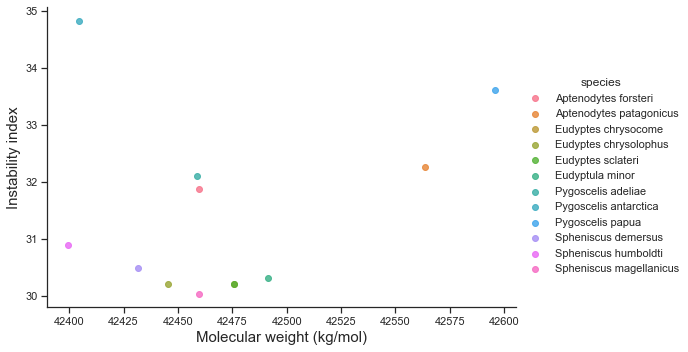

In [22]:
sns.set_style("ticks")
mol_weight_gc = sns.lmplot(x="mol_weight", y="instability_index", data=penguins_df_new, fit_reg=False, aspect=1.5, hue = "species")
# fit_reg=False prevents regression line from being added 
# aspect=1.5 to make plot wider than tall, making it easier to read
mol_weight_gc.set_axis_labels('Molecular weight (kg/mol)', 'Instability index', fontsize = 15)